# Natural Language Processing Lab
The purpose of todays lab is to calculate and validate the customer sentiment (polarity) based on reviews of purchased womens clothing, as an introduction to using NLP techniques on text data and retrieving actionable data insights per department / division at the womens clothing company.

## Retrieve the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

Load the data and check the header. Normalize the column names

In [2]:
data = pd.read_csv("data/Womens Clothing E-Commerce Reviews.csv", index_col=0)
data.head()
data.columns = data.columns.str.lower().str.strip().str.replace(" ","_")
data.head(5)

,clothing_id,age,title,review_text,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Choose the columns that will be used for the analysis

In [4]:
cust_rev = data[['title','review_text','rating','division_name','department_name']]
cust_rev.head()

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


## EDA

In [8]:
cust_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


Check the numerical variable: Seems to be between 1 and 5. The mean is pretty high and stdev is low, so it is assumed that the ratings are generally good, as there are also no rating points missing in the dataset. 

In [9]:
cust_rev.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


check which categories are in the dataset, also check for spelling

In [11]:
cust_rev['division_name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: division_name, dtype: int64

In [12]:
cust_rev['department_name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64

Check the mean rating by division and department, and plot it in a chart

In [41]:
avg_rating = cust_rev.groupby(['division_name','department_name'])['rating'].mean().sort_values()
avg_rating

division_name   department_name
General Petite  Trend              3.782609
General         Trend              3.852632
General Petite  Dresses            4.122328
General         Tops               4.136778
                Dresses            4.150318
General Petite  Tops               4.197520
General         Jackets            4.225962
General Petite  Intimate           4.242291
General         Bottoms            4.260727
Initmates       Intimate           4.275596
General Petite  Jackets            4.301587
                Bottoms            4.315226
Name: rating, dtype: float64

<AxesSubplot:ylabel='division_name,department_name'>

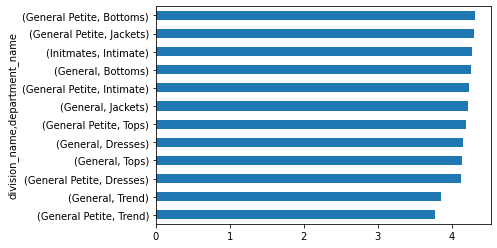

In [42]:
avg_rating.plot.barh()

## Sample customer reviews using textblob
Pull three different samples and see if the sentiment corresponds to what the text says

In [20]:
testim = cust_rev[cust_rev['rating']==5]['review_text'].iloc[10]
tbtest = TextBlob(testim)
print(tbtest.sentiment)
print(testim)

Sentiment(polarity=0.10238095238095238, subjectivity=0.680952380952381)
A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a dressier outfit.  i am 5' 5'', about 135 and the small fits great.


In [21]:
testim = cust_rev[cust_rev['rating']==3]['review_text'].iloc[10]
tbtest = TextBlob(testim)
print(tbtest.sentiment)
print(testim)

Sentiment(polarity=0.23627450980392156, subjectivity=0.43823529411764706)
I am in need of easy comfortable tops for everyday wear. i bought this top mostly because of the cute buttons. when i received it, it looked exactly as it does in the picture online, however, the buttons kept slipping out of their homes because the holes were slightly too big. the shirt fit but was just a tad snug near the upper arms, which would stretch and loosen up throughout the day. it's definitely a comfortable shirt, but it felt more like a pajama top. it's going back.


In [22]:
testim = cust_rev[cust_rev['rating']==1]['review_text'].iloc[5]
tbtest = TextBlob(testim)
print(tbtest.sentiment)
print(testim)

Sentiment(polarity=0.09653679653679653, subjectivity=0.5678787878787879)
The title says it all....this fabric of this top is both the best and worst part of the design. the colors are vibrant and the combination of materials (shoulder is a knit, sweater-like navy fabric) is interesting. however, that is where the positive comments end on this one. the top is so scratchy,, stiff, and, frankly, uncomfortable. i cannot imagine wanting to wear it. it could benefit from a lining, and that might have solved the problem of scratchy, itchy fabric.

the stiff fabric of the bo


Use Texblob to split a review into words and sentences

In [26]:
tbtest.words

WordList(['The', 'title', 'says', 'it', 'all', 'this', 'fabric', 'of', 'this', 'top', 'is', 'both', 'the', 'best', 'and', 'worst', 'part', 'of', 'the', 'design', 'the', 'colors', 'are', 'vibrant', 'and', 'the', 'combination', 'of', 'materials', 'shoulder', 'is', 'a', 'knit', 'sweater-like', 'navy', 'fabric', 'is', 'interesting', 'however', 'that', 'is', 'where', 'the', 'positive', 'comments', 'end', 'on', 'this', 'one', 'the', 'top', 'is', 'so', 'scratchy', 'stiff', 'and', 'frankly', 'uncomfortable', 'i', 'can', 'not', 'imagine', 'wanting', 'to', 'wear', 'it', 'it', 'could', 'benefit', 'from', 'a', 'lining', 'and', 'that', 'might', 'have', 'solved', 'the', 'problem', 'of', 'scratchy', 'itchy', 'fabric', 'the', 'stiff', 'fabric', 'of', 'the', 'bo'])

In [27]:
tbtest.sentences

[Sentence("The title says it all....this fabric of this top is both the best and worst part of the design."),
 Sentence("the colors are vibrant and the combination of materials (shoulder is a knit, sweater-like navy fabric) is interesting."),
 Sentence("however, that is where the positive comments end on this one."),
 Sentence("the top is so scratchy,, stiff, and, frankly, uncomfortable."),
 Sentence("i cannot imagine wanting to wear it."),
 Sentence("it could benefit from a lining, and that might have solved the problem of scratchy, itchy fabric."),
 Sentence("the stiff fabric of the bo")]

#### Cleaning nulls in the review_text column

In [29]:
cust_rev.dropna(axis=0, subset=['review_text'], inplace=True)
cust_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review_text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division_name    22628 non-null  object
 4   department_name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


<ipython-input-29-efd318cdc2be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_rev.dropna(axis=0, subset=['review_text'], inplace=True)


## Use a function to apply sentiment analysis to the whole data set
For this create a lambda function that extracts the polarity, and apply it to the review_text column

In [30]:
pol = lambda x: TextBlob(x).polarity

In [31]:
cust_rev['polarity'] = cust_rev['review_text'].map(pol)

<ipython-input-31-318d800948cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_rev['polarity'] = cust_rev['review_text'].map(pol)


In [32]:
cust_rev.head()

,title,review_text,rating,division_name,department_name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


Explore the minimum polarity by grouping per division and department 

In [36]:
min_pol = cust_rev.groupby(['division_name','department_name'])['polarity'].min().sort_values()
min_pol

division_name   department_name
General         Tops              -0.975000
                Dresses           -0.916667
                Jackets           -0.750000
General Petite  Tops              -0.700000
                Intimate          -0.575000
                Jackets           -0.562500
General         Bottoms           -0.533333
General Petite  Dresses           -0.400000
Initmates       Intimate          -0.392333
General         Trend             -0.270833
General Petite  Bottoms           -0.257778
                Trend             -0.083333
Name: polarity, dtype: float64

<AxesSubplot:ylabel='division_name,department_name'>

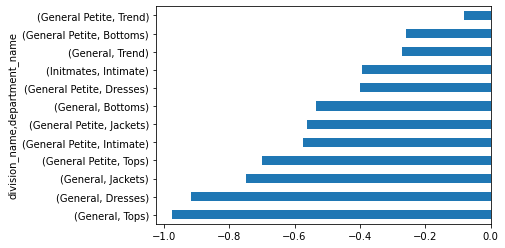

In [37]:
min_pol.plot.barh()

do the same with the average polarity

In [38]:
avg_pol = cust_rev.groupby(['division_name','department_name'])['polarity'].mean().sort_values()

<AxesSubplot:ylabel='division_name,department_name'>

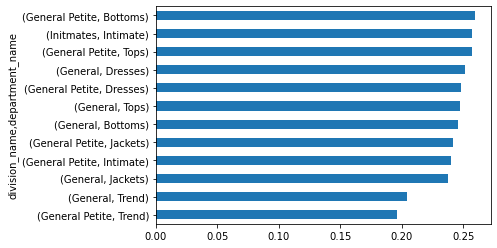

In [39]:
avg_pol.plot.barh()

* how accurate is the sentiment polarity calculated on this data set? how can you tell ?

We will compare the average of the ratigs vs the average of the polarity in a combined axis graph, that way we can see if they correlate 

In [59]:
compare = cust_rev.groupby(['division_name','department_name'])['polarity','rating'].mean()
compare

<ipython-input-59-140f0ae0b596>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  compare = cust_rev.groupby(['division_name','department_name'])['polarity','rating'].mean()


polarity    rating
division_name  department_name                    
General        Bottoms          0.245849  4.260727
               Dresses          0.251091  4.150318
               Jackets          0.237141  4.225962
               Tops             0.247025  4.136778
               Trend            0.203986  3.852632
General Petite Bottoms          0.259258  4.315226
               Dresses          0.248380  4.122328
               Intimate         0.239517  4.242291
               Jackets          0.241773  4.301587
               Tops             0.256835  4.197520
               Trend            0.195925  3.782609
Initmates      Intimate         0.256979  4.275596

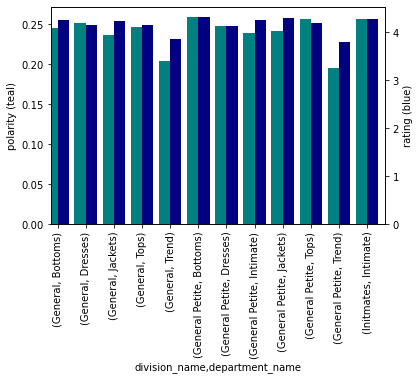

In [64]:
fig = plt.figure()

ax = fig.add_subplot() 
ax2 = ax.twinx() 

width = 0.4

compare.polarity.plot(kind='bar', color='teal', ax=ax, width=width, position=1)
compare.rating.plot(kind='bar', color='navy', ax=ax2, width=width, position=0)

ax.set_ylabel('polarity (teal)')
ax2.set_ylabel('rating (blue)')

plt.show()

But to see how well our sentiment analysis correlates to the ratings given by the customers, we can plot them both in a scatterplot, and see if the points have a strong correlation. In this case we can see that the points are close to correlation, but are quite far from being in the same line. a better polarity analysis would give better correlation in this situation. 

<AxesSubplot:xlabel='polarity', ylabel='rating'>

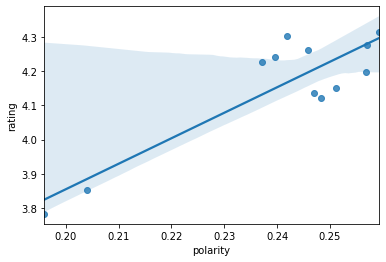

In [71]:
sns.regplot(data=compare, x='polarity', y='rating')

## More questions for further analysis:

3. through sample /limited experimentation, investigate whether processing / cleaning the review text might lead to a more accurate sentiment calculation
4. textblob has an alternative, naive bayes sentiment analyser that is trained on movie reviews - do you think this could be more accurate? what features would you choose to include if training a sentiment analysis model ? 
5. could there be advantages to utilising spacy+textblob instead? why? how would you identify a sentiment tool better suited to this data set?
6. install the needed packages and apply a second sentiment analysis method, end to end to evaluate the accuracy of the first approach
7. summarise what you have learnt in a .md file to accompany your notebook or annotations /images in the notebook itself 
8. tidy up your code as much as possible, consider modularising any elements of what you have done for re-usability and efficiency
